In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import numpy as np
from astropy import units as u
from astropy.units import imperial
from astropy import constants as const
from astropy.cosmology import WMAP9 as cosmo
imperial.enable()
from astropy.io.misc import yaml

## Color maps

Below the color map used for plotting. Color numbers are selected from the list below.

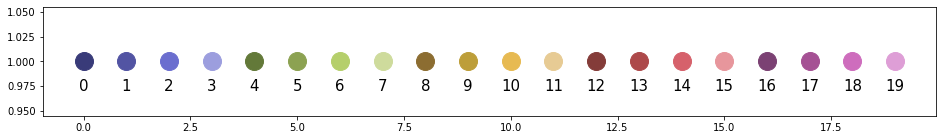

In [4]:
def get_color(color_id,
             ncolors=20):
    "get RGB color tuble"

    colormap = plt.cm.tab20b
    colors = [colormap(i) for i in np.linspace(0, 1, ncolors + 1)]
    
    return colors[color_id]

plt.figure(figsize=(16,2))

ncolor=20
for z in range(ncolor):
    plt.plot(z, 1., 'o',
            markerfacecolor=get_color(z, ncolor),
            markeredgecolor=get_color(z, ncolor),
            markersize=18)
    plt.text(z, 0.97, 
             str(z),
            fontsize=15,
            horizontalalignment='center')

## Axis labels

Definition of axis ticks and alphanumberical labels

In [5]:
# x-axis labels
x_dist=[]
x_label=[]

x_dist.append(1.e4)
x_label.append('10 km')

x_dist.append(1.e8)
x_label.append('$10^{5}$ km')

x_dist.append( (1*u.AU).to(u.m).value)
x_label.append('AE')

x_dist.append( (1*u.pc).to(u.m).value)
x_label.append('pc')

x_dist.append( (1*u.kpc).to(u.m).value)
x_label.append('kpc')

x_dist.append( (1*u.Mpc).to(u.m).value)
x_label.append('Mpc')

x_dist.append( (1*const.c/cosmo.H(0)).to(u.m).value)
x_label.append('cH$_{0}^{-1}$')

# y-axis labels
y_b = []
y_label = []

y_b.append( 1.e-9 )
y_label.append( "nG")

y_b.append( 1.e-6 )
y_label.append( "muG")

y_b.append( 1.e-3 )
y_label.append( "mG")

y_b.append( 1. )
y_label.append( "G")

y_b.append( 1.e3 )
y_label.append( "kG")

y_b.append( 1.e6 )
y_label.append( "MG")

y_b.append( 1.e9 )
y_label.append( "GG")

In [6]:
def plotMaxAcceleration(data, ax):
    """plot maximum acceleration"""
    
    xmin, xmax = ax.get_xlim()
    r = np.linspace(xmin, xmax, 250)
    
    for o, v in data.items():
        B = 1.e-6*2. \
        * v['energy']['value']*u.Unit(v['energy']['unit']).to(u.eV) /1.e15 \
        / ((r * u.m).to(u.pc).value)/v['charge']/v['beta']
        
        plt.plot(r,
                 B,
                 color=v['color'],
                 linestyle=v['linestyle'],
                 alpha=0.7,
                 zorder=0,
                 label=v['label'])
        ax.legend(fontsize=20)

In [7]:
def getValue(v, to_unit):
    return v['value']*u.Unit(v['unit']).to(to_unit)

def plotHillasObjects(data, ax):
    """
    plot Hillas objects
    - Markers
    - Circles
    - Boxes
    """
    
    # marker p
    for o, v in data.items():
        # plot label
        plt.text(getValue(v['label_pos_size'], u.m),
             getValue(v['label_pos_magn'], u.G),
             v['label_de'],
             fontsize=25,
             color=get_color(v['color']))
        
        # plot object
        if v['type'] == 'Marker':
            r = getValue(v['size'], u.m)
            B = getValue(v['magn'], u.G)
            plt.plot(r, 
                     B, 
                     'o',
                     markerfacecolor=get_color(v['color']),
                     markeredgecolor=get_color(v['color']),
                     markersize=18)
            
        elif v['type'] == 'Rectangle':
            r_min = getValue(v['size_min'], u.m)
            r_max = getValue(v['size_max'], u.m)
            B_min = getValue(v['magn_min'], u.G)
            B_max = getValue(v['magn_max'], u.G)
            ax.add_patch( Rectangle((r_min,
                           B_min),
                          r_max-r_min,
                          B_max-B_min,
                          facecolor=get_color(v['color'])))
            
        elif v['type'] == 'Trapezoid':
            r=[]
            B=[]
            r.append(getValue(v['size_1'], u.m))
            r.append(getValue(v['size_2'], u.m))
            r.append(getValue(v['size_3'], u.m))
            r.append(getValue(v['size_4'], u.m))
            B.append(getValue(v['magn_1'], u.G))
            B.append(getValue(v['magn_2'], u.G))
            B.append(getValue(v['magn_3'], u.G))
            B.append(getValue(v['magn_4'], u.G))
            ax.add_patch(patches.Polygon(
                xy=list(zip(r,B)),
                facecolor=get_color(v['color'])))

In [10]:
with open('HillasObjects-simplified.yaml') as f:
    data = yaml.load(f)

with open('ParticleAcceleration.yaml') as f:
    acceldata = yaml.load(f)

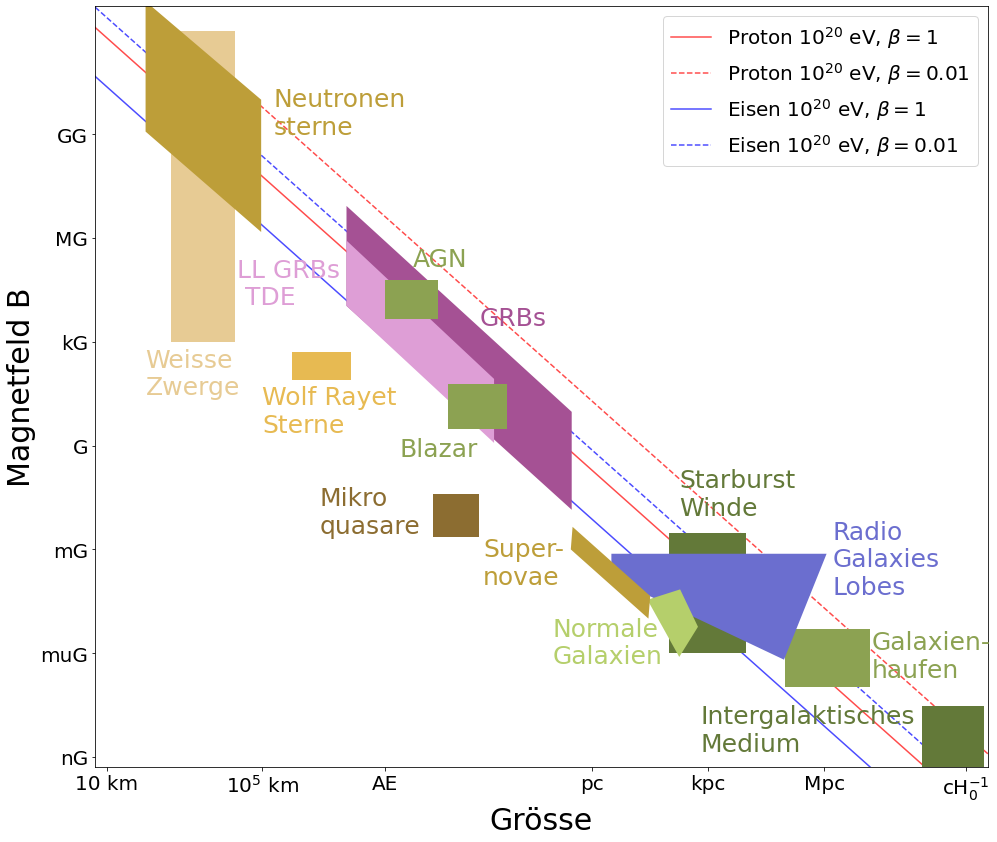

In [11]:
f=plt.figure(figsize=(16,14))
ax=plt.gca()

plt.xlim( 5.e3, 5.e26)
plt.xscale('log')
plt.xticks(x_dist, 
           x_label, 
           fontsize=20)
plt.xlabel('Grösse',
          fontsize=30)

plt.ylim(0.5e-9, 5.e12)
plt.yscale('log')
plt.yticks(y_b, 
           y_label,
          fontsize=20)

plt.ylabel('Magnetfeld B',
          fontsize=30)

# plot lines for maximum acceleration
# (see ParticleAcceleration.yaml)
plotMaxAcceleration(acceldata, ax)

# plot objects in size and magnetic field space
# (see HillasObjects.yaml)
plotHillasObjects(data, ax)

# save plots to pdf
f.savefig("HillasPlot.pdf")

In [10]:
(1.*u.Mpc).to(u.m)

<Quantity 3.08567758e+22 m>